# OpenCV Image Translation
* Translation의 의미 - X축과 Y축을 따라 이미지를 이동시키는 행위를 말함
* 이미지로드 -> 아핀변환행렬 정의 -> cv2.warpAffine()메소드 사용용

### 이미지의 이동, 크기조정, 회전관련 패키지 설치
* [깃헙 참조](https://girhub.com/jrosebr1/imutils/blob/master/imutils/convenience.py#L17)

In [ ]:
!pip install imutils

### 이미지 다운로드

In [8]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-translate/opencv-translate.zip
!unzip -qq opencv-translate.zip
%cd opencv-translate

--2021-04-19 01:18:29--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-translate/opencv-translate.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.153.57
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.153.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34437 (34K) [application/zip]
Saving to: ‘opencv-translate.zip’

opencv-translate.zi 100%[===================>]  33.63K  --.-KB/s    in 0.1s    

2021-04-19 01:18:30 (256 KB/s) - ‘opencv-translate.zip’ saved [34437/34437]

/content/opencv-translate


### Affin Translation Matrix

In [ ]:
from IPython.display import Image

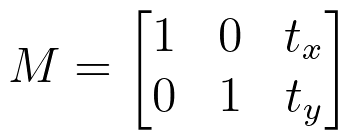

In [ ]:
Image('/content/sample_data/opencv_translate_matrix.png')

* $ t_x $ 가 음수이면 이미지는 좌측으로 이동
* $ t_x $ 가 양수이면 이미지는 우측으로 이동
* $ t_y $ 가 음수이면 이미지는 위쪽으로 이동
* $ t_y $ 가 양수이면 이미지는 아래로 이동

### Read Eval Print Loop for Image Translation
* 이미지 이동

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

In [17]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [3]:
# 이미지를 오른쪽으로 25픽셀
# 아래로 50픽셀 이동
M = np.float32([
  [1, 0, 25],
	[0, 1, 50]])
M.shape

(2, 3)

In [5]:
# 이미지를 좌측으로 이동(7만큼), 
# 좌측으로 7픽셀 이동
# 위로 23픽셀 이동
M = np.float32([
	[1, 0, -7],
	[0, 1, -23]
])

In [23]:
# 좌측으로 30픽셀이동
# 아래로 12픽셀 이동
shiftX, shiftY = -30, 12
M = np.float32([[1, 0, shiftX],  
                [0, 1, shiftY]])

In [12]:
help(cv2.warpAffine)

Help on built-in function warpAffine:

warpAffine(...)
    warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
    .   @brief Applies an affine transformation to an image.
    .   
    .   The function warpAffine transforms the source image using the specified matrix:
    .   
    .   \f[\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})\f]
    .   
    .   when the flag #WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted
    .   with #invertAffineTransform and then put in the formula above instead of M. The function cannot
    .   operate in-place.
    .   
    .   @param src input image.
    .   @param dst output image that has the size dsize and the same type as src .
    .   @param M \f$2\times 3\f$ transformation matrix.
    .   @param dsize size of the output image.
    .   @param flags combination of interpolation methods (

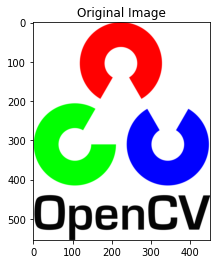

(554, 450, 3)

numpy.ndarray

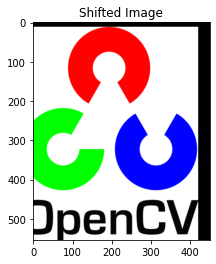

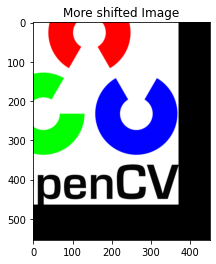

In [25]:
# Affin Translation Matrix적용
image = cv2.imread("/content/opencv-translate/opencv_logo.png")
image.shape

plt_imshow("Original Image", image)

#실제 이동(translation)이 발생
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
display(shifted.shape, type(shifted))  # (554, 450, 3) , numpy.ndarray

plt_imshow("Shifted Image", shifted)

shiftX, shiftY = -50, -90
M = np.float32([[1, 0, shiftX],
                [0, 1, shiftY]])

more_shift = cv2.warpAffine(shifted, M, (image.shape[1], image.shape[0]))
plt_imshow("More shifted Image", more_shift)

* 위의 방법은 이미지의 이동위치를 지정해주고, 매뉴얼하게 해당 API를 직접 호출하는 방법이지만 다음과 같은 방법도 한번 보자 

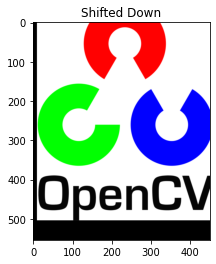

In [36]:
shifted = imutils.translate(image,10, -50)  # width, height
plt_imshow("Shifted Down", shifted)

## 코드 수행

### 패키지 임포트

In [39]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [40]:
def plt_imshow(title, image):
  '''
  이미지 프레임을 BGR에서 RGB로 변환하고 이미지 재생
  '''
  iamge = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

### OpenCV를 이용한 이미지 이동

In [41]:
# 파이썬 쉘환경에서 파이썬 스크립트 수행
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="opencv_logo.png",
#	help="path to the input image")
#args = vars(ap.parse_args())

# 쥬피터 및 코랩에서 수행하므로 위 부분 주석 처리 
args = {
	"image": "opencv_logo.png"
}

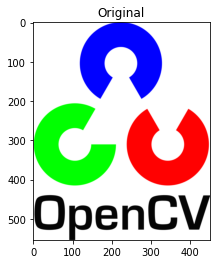

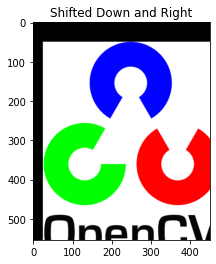

In [42]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

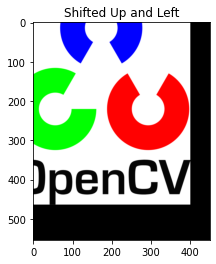

In [44]:
# 50픽셀만큼 왼쪽 이동시키고(width), 90픽셀만큼 위로 이동(height)
# up by specifying negative values for the x and y directions,
# respectively
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

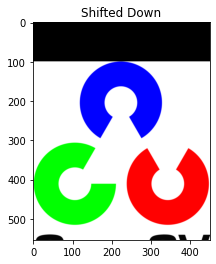

In [45]:
# use the imutils helper function to translate the image 100 pixels
# down in a single function call
shifted = imutils.translate(image, 0, 100)
plt_imshow("Shifted Down", shifted)